In [8]:
#This imports the relevant dependencies
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import scipy.stats as st
import seaborn as sns

In [9]:
#This brings in the top 100 employers list
filename = "resources/employers_clean.csv"
employers_df=pd.read_csv(filename)

In [10]:
employers_df.head()

,RANK,NAME,TICKER,INDUSTRIES,Country,EMPLOYEES,Glassdoor Rating,City,mergent_name,mergent_ticker,mergent_compnumber,mergent_mic
0,1,Samsung Electronics,005930.KS,"Semiconductors, Electronics, Electrical Engine...",South Kore,"266,673",3.8,Suwon,Samsung Electronics Co Ltd,SSNN F,74454.0,6.2.4
1,2,Microsoft,MSFT,"IT, Internet, Software & Services",United States,"221,000",4.4,Redmond,Microsoft Corporation,MSFT,46247.0,6.3.2
2,3,IBM,IBM,"Semiconductors, Electronics, Electrical Engine...",United States,"250,000",4.2,Armonk,International Business Machines Corp.,IBM,4427.0,6.3.1
3,4,Alphabet,GOOG,"IT, Internet, Software & Services",United States,"156,500",4.5,Mountain View,Alphabet Inc,GOOG L,109717.0,2.3.2
4,5,Apple,AAPL,"Semiconductors, Electronics, Electrical Engine...",United States,"154,000",4.1,Cupertino,Apple Inc,AAPL,12161.0,6.2.1


In [11]:
#This removes the companies without a ticker code
employers_reduced = employers_df[employers_df["TICKER"] != 'none'].reset_index(drop=True)

In [12]:
#This displays the listed companies
employers_reduced.head()

,RANK,NAME,TICKER,INDUSTRIES,Country,EMPLOYEES,Glassdoor Rating,City,mergent_name,mergent_ticker,mergent_compnumber,mergent_mic
0,1,Samsung Electronics,005930.KS,"Semiconductors, Electronics, Electrical Engine...",South Kore,"266,673",3.8,Suwon,Samsung Electronics Co Ltd,SSNN F,74454.0,6.2.4
1,2,Microsoft,MSFT,"IT, Internet, Software & Services",United States,"221,000",4.4,Redmond,Microsoft Corporation,MSFT,46247.0,6.3.2
2,3,IBM,IBM,"Semiconductors, Electronics, Electrical Engine...",United States,"250,000",4.2,Armonk,International Business Machines Corp.,IBM,4427.0,6.3.1
3,4,Alphabet,GOOG,"IT, Internet, Software & Services",United States,"156,500",4.5,Mountain View,Alphabet Inc,GOOG L,109717.0,2.3.2
4,5,Apple,AAPL,"Semiconductors, Electronics, Electrical Engine...",United States,"154,000",4.1,Cupertino,Apple Inc,AAPL,12161.0,6.2.1


In [14]:
#This adds new columns for the data that will be brought in using Yfinance
employers_reduced['1 year stock performance']=""
employers_reduced['return on equity']=""
employers_reduced['Analyst Recommendation Mean']=""
employers_reduced['Operating Income']=""


employers_reduced.head()

,RANK,NAME,TICKER,INDUSTRIES,Country,EMPLOYEES,Glassdoor Rating,City,mergent_name,mergent_ticker,mergent_compnumber,mergent_mic,1 year stock performance,return on equity,Analyst Recommendation Mean,Operating Income
0,1,Samsung Electronics,005930.KS,"Semiconductors, Electronics, Electrical Engine...",South Kore,"266,673",3.8,Suwon,Samsung Electronics Co Ltd,SSNN F,74454.0,6.2.4,,,,
1,2,Microsoft,MSFT,"IT, Internet, Software & Services",United States,"221,000",4.4,Redmond,Microsoft Corporation,MSFT,46247.0,6.3.2,,,,
2,3,IBM,IBM,"Semiconductors, Electronics, Electrical Engine...",United States,"250,000",4.2,Armonk,International Business Machines Corp.,IBM,4427.0,6.3.1,,,,
3,4,Alphabet,GOOG,"IT, Internet, Software & Services",United States,"156,500",4.5,Mountain View,Alphabet Inc,GOOG L,109717.0,2.3.2,,,,
4,5,Apple,AAPL,"Semiconductors, Electronics, Electrical Engine...",United States,"154,000",4.1,Cupertino,Apple Inc,AAPL,12161.0,6.2.1,,,,


In [15]:
#This sets up a loop through the rows in the table and searchs each company on its ticker code
#The relevant information is added to the empty columns.
#It also prints the company information to the screen.
#If any of the data is missing, the loop returns "No data found"

print('Finding stock data..')
print("-"*20)
for index,row in employers_reduced.iterrows():
    company=employers_reduced.loc[index,'NAME']
    ticker=employers_reduced.loc[index,'TICKER']
    stock_data=yf.Ticker(ticker)
    try:
        employers_reduced.loc[index, "1 year stock performance"]=round(stock_data.info["52WeekChange"]*100,2)
        employers_reduced.loc[index, "return on equity"]=round(stock_data.info["returnOnEquity"]*100,2)
        employers_reduced.loc[index, "Analyst Recommendation Mean"]=stock_data.info['recommendationMean']
        employers_reduced.loc[index, 'Operating Income']=stock_data.info['ebitda']
    except:
        employers_reduced.loc[index, "1 year stock performance"]="No data found"
        employers_reduced.loc[index, "return on equity"]="No data found"
        employers_reduced.loc[index, "Analyst Recommendation Mean"]="No data found"
        employers_reduced.loc[index, "Operating Income"]="No data found"
        
    print(f"{company} ({ticker}): {employers_reduced.loc[index, '1 year stock performance']}% 1yr stock performance; {employers_reduced.loc[index, 'return on equity']}% RoE; Mean Analyst Rec: {employers_reduced.loc[index, 'Analyst Recommendation Mean']}; EBITDA: {employers_reduced.loc[index, 'Operating Income']}")
    print("-"*20)

employers_reduced

Finding stock data..
--------------------
Samsung Electronics (005930.KS): -21.55% 1yr stock performance; 13.29% RoE; Mean Analyst Rec: 1.8; EBITDA: 90943910838272
--------------------
Microsoft (MSFT): -20.95% 1yr stock performance; 42.88% RoE; Mean Analyst Rec: 1.8; EBITDA: 98841001984
--------------------
IBM (IBM): 9.74% 1yr stock performance; 6.48% RoE; Mean Analyst Rec: 2.5; EBITDA: 12010000384
--------------------
Alphabet (GOOG): -31.91% 1yr stock performance; 26.89% RoE; Mean Analyst Rec: 1.5; EBITDA: 93733003264
--------------------
Apple (AAPL): -20.64% 1yr stock performance; 175.46% RoE; Mean Analyst Rec: 2; EBITDA: 130541002752
--------------------
Delta Air Lines (DAL): -3.39% 1yr stock performance; 2.25% RoE; Mean Analyst Rec: 1.7; EBITDA: 4472000000
--------------------
Costco Wholesale (COST): -0.58% 1yr stock performance; 29.32% RoE; Mean Analyst Rec: 2.1; EBITDA: 9648000000
--------------------
Adobe (ADBE): -32.91% 1yr stock performance; 32.97% RoE; Mean Analyst Rec

Volvo Group (VOLCAR-B.ST): -45.32% 1yr stock performance; 17.51% RoE; Mean Analyst Rec: None; EBITDA: 26701000704
--------------------
Alibaba Group (BABA): -9.01% 1yr stock performance; -0.12% RoE; Mean Analyst Rec: 1.9; EBITDA: 146090000384
--------------------
Intel (INTC): -45.01% 1yr stock performance; 14.0% RoE; Mean Analyst Rec: 3.3; EBITDA: 20846000128
--------------------
Viatris (VTRS): -23.37% 1yr stock performance; 3.99% RoE; Mean Analyst Rec: 2.6; EBITDA: 5998499840
--------------------
Mitsubishi Electric (8058.T): 9.48% 1yr stock performance; 17.49% RoE; Mean Analyst Rec: 2; EBITDA: 1406378967040
--------------------
Pirelli (PIRC.MI): -30.46% 1yr stock performance; 8.42% RoE; Mean Analyst Rec: 2; EBITDA: 1228393984
--------------------
Enel (ENEL.MI): -16.54% 1yr stock performance; 6.64% RoE; Mean Analyst Rec: 2.1; EBITDA: 14380000256
--------------------
Naver (035420.KS): -43.23% 1yr stock performance; 3.47% RoE; Mean Analyst Rec: 2; EBITDA: 1706498850816
------------

,RANK,NAME,TICKER,INDUSTRIES,Country,EMPLOYEES,Glassdoor Rating,City,mergent_name,mergent_ticker,mergent_compnumber,mergent_mic,1 year stock performance,return on equity,Analyst Recommendation Mean,Operating Income
0,1,Samsung Electronics,005930.KS,"Semiconductors, Electronics, Electrical Engine...",South Kore,"266,673",3.8,Suwon,Samsung Electronics Co Ltd,SSNN F,74454.0,6.2.4,-21.55,13.29,1.8,90943910838272
1,2,Microsoft,MSFT,"IT, Internet, Software & Services",United States,"221,000",4.4,Redmond,Microsoft Corporation,MSFT,46247.0,6.3.2,-20.95,42.88,1.8,98841001984
2,3,IBM,IBM,"Semiconductors, Electronics, Electrical Engine...",United States,"250,000",4.2,Armonk,International Business Machines Corp.,IBM,4427.0,6.3.1,9.74,6.48,2.5,12010000384
3,4,Alphabet,GOOG,"IT, Internet, Software & Services",United States,"156,500",4.5,Mountain View,Alphabet Inc,GOOG L,109717.0,2.3.2,-31.91,26.89,1.5,93733003264
4,5,Apple,AAPL,"Semiconductors, Electronics, Electrical Engine...",United States,"154,000",4.1,Cupertino,Apple Inc,AAPL,12161.0,6.2.1,-20.64,175.46,2,130541002752
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,95,DBS Bank,D05.SI,Banking and Financial Services,Singapore,"33,000",3.9,Singapore,DBS Group Holdings Ltd.,DBSD Y,12683.0,5.1.1,No data found,No data found,No data found,No data found
81,96,Mastercard,MA,Banking and Financial Services,United States,"24,000",4.3,Purchase,Mastercard Inc,MA,113838.0,7.5.2,No data found,No data found,No data found,No data found
82,97,Electricite de France,EDF.PA,Utilities,France,"167,157",4.0,Paris,Electricite de France,ECIF Y,14498.0,3.1.1,No data found,No data found,No data found,No data found
83,98,Verbund,VER.VI,Utilities,Austria,"3,184",4.7,Vienna,Verbund AG,OEZV Y,40705.0,3.1.1,No data found,No data found,No data found,No data found


In [16]:
#This drops any companies with no data found.
employers_reduced["Operating Income"].astype(str)
employers_filter=employers_reduced.dropna(axis=0,how='any')
employers_filter=employers_filter.loc[employers_filter['1 year stock performance']!= "No data found"]
employers_filter["Operating Income"].astype(int)
employers_filter["EMPLOYEES"]=employers_filter["EMPLOYEES"].str.replace(',', '').astype(int)


employers_filter.head()



,RANK,NAME,TICKER,INDUSTRIES,Country,EMPLOYEES,Glassdoor Rating,City,mergent_name,mergent_ticker,mergent_compnumber,mergent_mic,1 year stock performance,return on equity,Analyst Recommendation Mean,Operating Income
0,1,Samsung Electronics,005930.KS,"Semiconductors, Electronics, Electrical Engine...",South Kore,266673,3.8,Suwon,Samsung Electronics Co Ltd,SSNN F,74454.0,6.2.4,-21.55,13.29,1.8,90943910838272
1,2,Microsoft,MSFT,"IT, Internet, Software & Services",United States,221000,4.4,Redmond,Microsoft Corporation,MSFT,46247.0,6.3.2,-20.95,42.88,1.8,98841001984
2,3,IBM,IBM,"Semiconductors, Electronics, Electrical Engine...",United States,250000,4.2,Armonk,International Business Machines Corp.,IBM,4427.0,6.3.1,9.74,6.48,2.5,12010000384
3,4,Alphabet,GOOG,"IT, Internet, Software & Services",United States,156500,4.5,Mountain View,Alphabet Inc,GOOG L,109717.0,2.3.2,-31.91,26.89,1.5,93733003264
4,5,Apple,AAPL,"Semiconductors, Electronics, Electrical Engine...",United States,154000,4.1,Cupertino,Apple Inc,AAPL,12161.0,6.2.1,-20.64,175.46,2,130541002752


In [17]:
#This calculates an 'operating income per employee' figure
employers_filter["Operating income per employee"]=employers_filter["Operating Income"]/employers_filter["EMPLOYEES"]
employers_filter["Operating income per employee"]=employers_filter["Operating income per employee"].astype(int)
employers_filter.head()

,RANK,NAME,TICKER,INDUSTRIES,Country,EMPLOYEES,Glassdoor Rating,City,mergent_name,mergent_ticker,mergent_compnumber,mergent_mic,1 year stock performance,return on equity,Analyst Recommendation Mean,Operating Income,Operating income per employee
0,1,Samsung Electronics,005930.KS,"Semiconductors, Electronics, Electrical Engine...",South Kore,266673,3.8,Suwon,Samsung Electronics Co Ltd,SSNN F,74454.0,6.2.4,-21.55,13.29,1.8,90943910838272,341031566
1,2,Microsoft,MSFT,"IT, Internet, Software & Services",United States,221000,4.4,Redmond,Microsoft Corporation,MSFT,46247.0,6.3.2,-20.95,42.88,1.8,98841001984,447244
2,3,IBM,IBM,"Semiconductors, Electronics, Electrical Engine...",United States,250000,4.2,Armonk,International Business Machines Corp.,IBM,4427.0,6.3.1,9.74,6.48,2.5,12010000384,48040
3,4,Alphabet,GOOG,"IT, Internet, Software & Services",United States,156500,4.5,Mountain View,Alphabet Inc,GOOG L,109717.0,2.3.2,-31.91,26.89,1.5,93733003264,598932
4,5,Apple,AAPL,"Semiconductors, Electronics, Electrical Engine...",United States,154000,4.1,Cupertino,Apple Inc,AAPL,12161.0,6.2.1,-20.64,175.46,2,130541002752,847668


In [18]:
#This sets up variables to be used in the plots below.
stock = employers_filter['1 year stock performance'].astype(float)
stock_z=st.zscore(stock)

roe= employers_filter['return on equity'].astype(float)
roe_z=st.zscore(roe)

op_emp=employers_filter['Operating income per employee'].astype(float)
op_emp_z=st.zscore(op_emp)

analyst=employers_filter['Analyst Recommendation Mean'].astype(float)
analyst_z=st.zscore(analyst)

In [19]:
#This sets up variables to be used in the plots below.
rank=employers_filter["RANK"]
glassdoor=employers_filter["Glassdoor Rating"]
rec=employers_filter["Analyst Recommendation Mean"]
stock=employers_filter["1 year stock performance"]


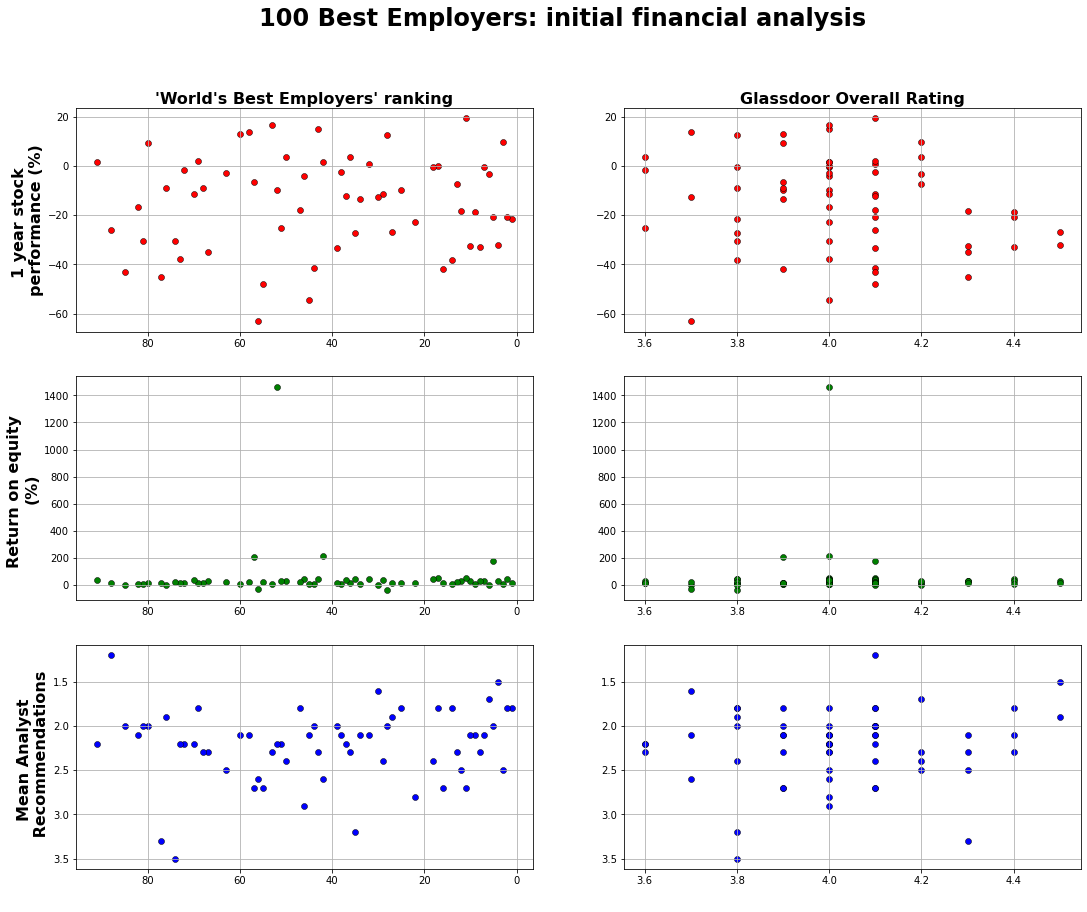

<Figure size 432x288 with 0 Axes>

In [20]:
#This creates plt subplots for the financial metrics against the employer data
fig,axes=plt.subplots(3,2, figsize=(18,14))
fig.suptitle('100 Best Employers: initial financial analysis', size=24, weight='bold')

ax1=sns.scatterplot(ax=axes[0,0], data=employers_filter, x='RANK',y='1 year stock performance',color='red',edgecolor="black")
axes[0,0].invert_xaxis()
axes[0,0].set_ylabel('1 year stock \nperformance (%)',fontsize = 16, weight='bold')
axes[0,0].set_xlabel("'World's Best Employers' ranking",fontsize = 16, weight='bold')
axes[0,0].xaxis.set_label_position('top') 
axes[0,0].grid()

sns.scatterplot(ax=axes[0,1], data=employers_filter, x='Glassdoor Rating',y='1 year stock performance',color='red',edgecolor="black")
axes[0,1].set_ylabel(' ',fontsize = 16)
axes[0,1].set_xlabel("Glassdoor Overall Rating",fontsize = 16, weight='bold')
axes[0,1].xaxis.set_label_position('top') 
axes[0,1].grid()

sns.scatterplot(ax=axes[1,0], data=employers_filter, x='RANK',y='return on equity',color='green',edgecolor="black")
axes[1,0].invert_xaxis()
axes[1,0].set_ylabel('Return on equity \n(%)',fontsize = 16, weight='bold')
axes[1,0].set_xlabel(" ",fontsize = 16)
axes[1,0].grid()

sns.scatterplot(ax=axes[1,1], data=employers_filter, x='Glassdoor Rating',y='return on equity',color='green',edgecolor="black")
axes[1,1].set_ylabel(' ',fontsize = 16)
axes[1,1].set_xlabel(" ",fontsize = 16)
axes[1,1].grid()

sns.scatterplot(ax=axes[2,0], data=employers_filter, x='RANK',y='Analyst Recommendation Mean',color='blue',edgecolor="black")
axes[2,0].invert_xaxis()
axes[2,0].invert_yaxis()
axes[2,0].set_ylabel('Mean Analyst \n Recommendations',fontsize = 16, weight='bold')
axes[2,0].set_xlabel(" ",fontsize = 16)
axes[2,0].grid()

sns.scatterplot(ax=axes[2,1], data=employers_filter, x='Glassdoor Rating',y='Analyst Recommendation Mean',color='blue',edgecolor="black")
axes[2,1].set_ylabel(' ',fontsize = 16)
axes[2,1].invert_yaxis()
axes[2,1].set_xlabel(" ",fontsize = 16)
axes[2,1].grid()

# sns.scatterplot(ax=axes[3,0], data=employers_filter, x='RANK',y='Operating income per employee',color='blue',edgecolor="black")
# axes[3,0].invert_xaxis()
# axes[3,0].set_ylabel('Op. income per \n employee ($)',fontsize = 16, weight='bold')
# axes[3,0].set_xlabel(" ",fontsize = 16)


# sns.scatterplot(ax=axes[3,1], data=employers_filter, x='Glassdoor Rating',y='Operating income per employee',color='blue',edgecolor="black")
# axes[3,1].set_ylabel(" ",fontsize = 16)
# axes[3,1].set_xlabel(" ",fontsize = 16)

plt.show()
plt.savefig('Images/Yfinance_scatter.png')


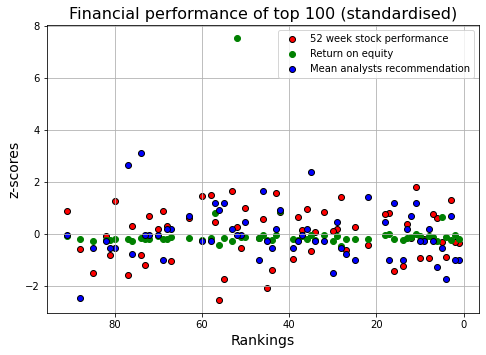

<Figure size 432x288 with 0 Axes>

In [21]:
#This produces a standardised plot of financial performance.
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax1=ax.scatter(rank,stock_z,color='Red',label='52 week stock performance',edgecolor="black")
ax2=ax.scatter(rank,roe_z,color='green',label='Return on equity')
ax3=ax.scatter(rank,analyst_z,color='blue',label="Mean analysts recommendation",edgecolor="black")
# ax4=ax.scatter(rank,op_emp_z,color='blue',label="Operating income per employee")
ax.legend(handles=[ax1,ax2,ax3],prop={'size':10})
ax.set_xlabel("Rankings", size=14)
ax.set_ylabel("z-scores", size=14)
ax.set_title("Financial performance of top 100 (standardised)",size=16)
ax.invert_xaxis()
plt.grid()
plt.show()
plt.savefig('Images/fin_perf_std.png')